In [13]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import itertools

In [14]:
data = pd.read_csv('C:/Users/SUPRITH KS/Documents/Visual Studio/Projects/twitterf-main/data/twitter_dataset.csv')
data.head()

,name_wt,statuses_count,followers_count,friends_count,favourites_count,listed_count,label
0,0.600000,195,19,53,58,0,0
1,0.705882,9,67,555,2,1,0
2,0.916667,20,21,267,0,0,1
3,0.500000,28,16,325,0,0,1
4,0.733333,45,20,515,0,0,1


In [15]:
features=[]
for attributes in data.columns:
    if attributes != 'label':
        features.append(attributes)
features

['name_wt',
 'statuses_count',
 'followers_count',
 'friends_count',
 'favourites_count',
 'listed_count']

In [16]:
# Extract features and labels
X = data[features]
y = data.label


In [17]:

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Define the base models
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
nb = GaussianNB()
nn = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42, max_iter=1000)

meta = MLPClassifier(hidden_layer_sizes=(16,), activation='relu', solver='adam', random_state=42, max_iter=1000)


In [19]:
# Define the stacking classifier
estimators = [('dt', dt), ('nb', nb), ('nn', nn)]
stacking = StackingClassifier(estimators=estimators, final_estimator=meta)

In [20]:
# Train the stacking classifier
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(max_depth=10,
                                                       random_state=42)),
                               ('nb', GaussianNB()),
                               ('nn',
                                MLPClassifier(hidden_layer_sizes=(64, 32),
                                              max_iter=1000,
                                              random_state=42))],
                   final_estimator=MLPClassifier(hidden_layer_sizes=(16,),
                                                 max_iter=1000,
                                                 random_state=42))

In [21]:
# Make predictions on validation set
y_pred = stacking.predict(X_val)

In [22]:
# Calculate the metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

In [23]:
print(f"Accuracy: {100*accuracy:.3f}")
print(f"Precision: {100*precision:.3f}")
print(f"Recall: {100*recall:.3f}")
print(f"F1-score: {100*f1:.3f}")

Accuracy: 98.936
Precision: 98.582
Recall: 99.286
F1-score: 98.932


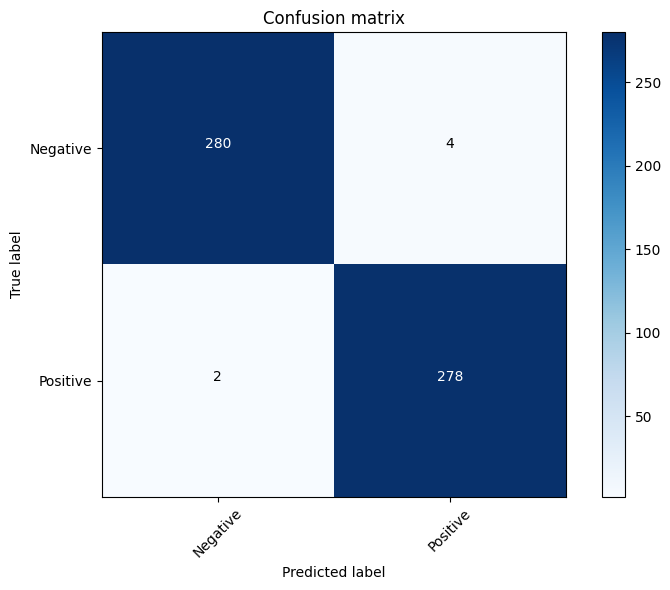

In [24]:
# Calculate and plot the confusion matrix
conf_mat = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'], rotation=45)
plt.yticks(tick_marks, ['Negative', 'Positive'])
thresh = conf_mat.max() / 2.
for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
    plt.text(j, i, format(conf_mat[i, j], 'd'), horizontalalignment="center", color="white" if conf_mat[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()